# Clustering With K Means - Python Tutorial

# Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("income.csv")
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

# Exploratory Data Analysis

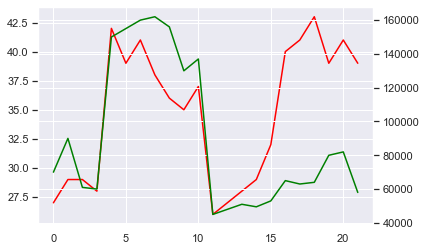

In [3]:
fig, ax1 = plt.subplots()
df.loc[:,'Age'].plot(ax=ax1, color='red')
ax2 = ax1.twinx()
df['Income($)'].plot(ax=ax2, color='green')

Text(0, 0.5, 'Income($)')

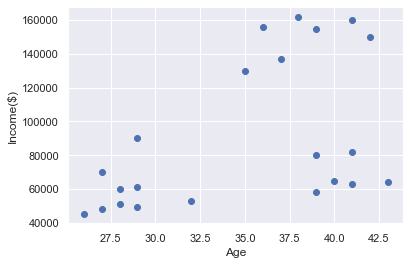

In [4]:
plt.scatter(df.Age, df['Income($)']);
plt.xlabel('Age')
plt.ylabel('Income($)')

# KMeans Model

In [5]:
km = KMeans(n_clusters=3) # A escolha por 3 clusters foi devido à análise gráfica acima

In [6]:
y_predicted = km.fit_predict(df.drop(columns='Name'))
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


# Analysing Results

In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

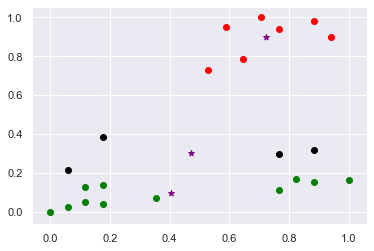

In [16]:
df1 = df[df.cluster.eq(0)]
df2 = df[df.cluster.eq(1)]
df3 = df[df.cluster.eq(2)]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# Preprocessing and Scaling the Data

In [20]:
df_scaled = df.drop(columns='cluster').copy()
df_scaled.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(df_scaled[['Income($)']])
df_scaled['Income($)'] = scaler.transform(df_scaled[['Income($)']])

In [23]:
scaler.fit(df_scaled[['Age']])
df_scaled['Age'] = scaler.transform(df_scaled[['Age']])

In [25]:
df_scaled.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


# Applying KMeans in Scaled Dataset

In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scaled.drop(columns='Name'))
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [27]:
df_scaled['cluster'] = y_predicted
df_scaled.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [28]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

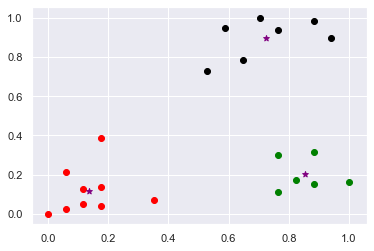

In [29]:
df1 = df_scaled[df_scaled.cluster.eq(0)]
df2 = df_scaled[df_scaled.cluster.eq(1)]
df3 = df_scaled[df_scaled.cluster.eq(2)]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# Elbow Plot

In [18]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # km.inertia is going to give the sum of squared error

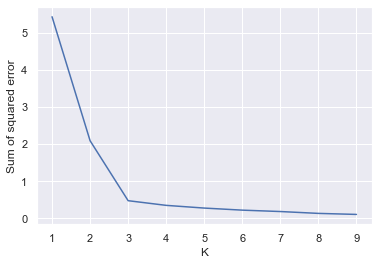

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)